# This is the notebook for my Coursera IBM Datascience Capstone project

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


To fix: convert values in the selected features to be a float.

# Introduction/Business Problem

I am looking to determine the probability of a car accident occuring as well as the severity of the accident. I will be utilizing weather, traffic, and road contidion data in order to determine these two factors. My target audience will be car drivers who would like to know this information in order to be safer on the road.

# Data

I will be using the data from the csv provided for my predictions. I will definately be utilizing the road contidtions, weather, and severity. I will be utilizing AI trained on the sample data in order to predict the results. A simple at a glance example would be if it is dark outside, in weather that has bad visibility, at night (which also has bad visiblity), with wet/icy road contitions, then the results should show a high probability of an accident, with the severity being either "Property damage only" or "Injury Collision"

# PLAYING WITH RANDOM THINGS, WILL BE FIXED LATER

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

print('Done!')

Done!


In [4]:
!conda install -c anaconda seaborn -y
import seaborn as sns
print('Seaborn imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [3]:
!wget -O collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-28 18:15:30--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘collisions.csv’

100%[======================================>] 73,917,638  45.7MB/s   in 1.5s   

2020-08-28 18:15:31 (45.7 MB/s) - ‘collisions.csv’ saved [73917638/73917638]



In [23]:
df = pd.read_csv('collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [24]:
df.shape

(194673, 38)

### Data Visualization and Preprocessing

In [25]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [26]:
df.shape

(194673, 38)

In [27]:
dfSev = df['SEVERITYDESC'].value_counts()
dfSev

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

## Property Damage Only vs Injury Collision

In [28]:
#set the colors for collision for the following charts
pdoCol = '#FFC416'
injCol = '#FF3B00'
collcol = (pdoCol, injCol)

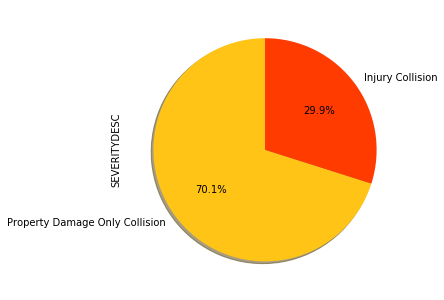

In [29]:
dfSevP = dfSev.plot(kind = 'pie',
                    figsize = (5,6),
                    autopct='%1.1f%%',
                    startangle = 90,
                    colors = collcol,
                    shadow = True
                   )

As we can see from this simple pie chart, in most collisions there is only propertjy damage compared to injuries by a fairly significant margin

## Light and Injury

In [30]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [31]:
lc = df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts()
lc

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision     1203
                          Injury Collision                    334
Dark - Street Lights Off  Property Damage Only Collision      883
                          Injury Collision                    316
Dark - Street Lights On   Property Damage Only Collision    34032
                          Injury Collision                  14475
Dark - Unknown Lighting   Property Damage Only Collision        7
                          Injury Collision                      4
Dawn                      Property Damage Only Collision     1678
                          Injury Collision                    824
Daylight                  Property Damage Only Collision    77593
                          Injury Collision                  38544
Dusk                      Property Damage Only Collision     3958
                          Injury Collision                   1944
Other              

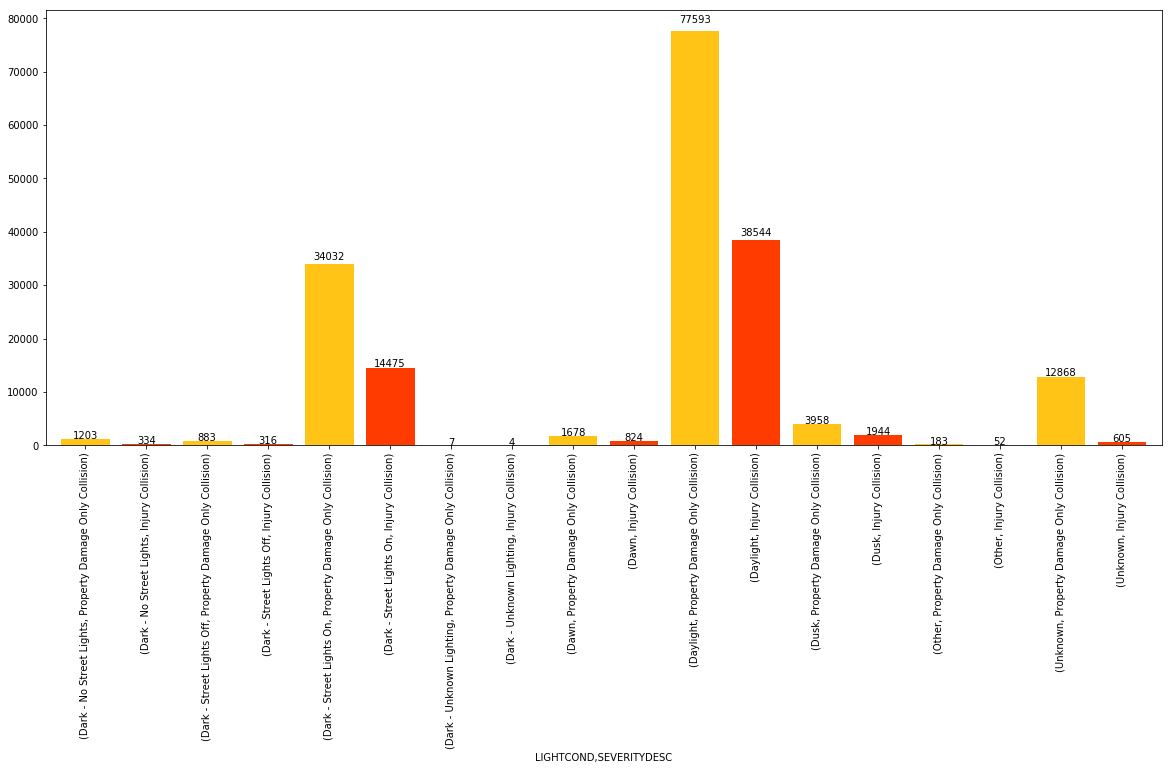

In [32]:
lcp = lc.plot(kind = 'bar', figsize = (20,8), width = 0.8, color = collcol) #using the yellow color for prop damage, red for injury and the defaults burn my eyes
plt.title = 'Light Condition and Severity of Crashes'
#plt.legend(loc = 2, fontsize = 14)

for p in lcp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    lcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

From the bar chart we can see that with the exception of the 'Unknown' light condition category 

In [33]:
stuff = df[['SEVERITYCODE', 'ROADCOND', 'LIGHTCOND' , 'WEATHER']]
stuff.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [34]:
"""#trying some other stuff out
stuffv = stuff.valuecounts()
sp = stuffv.plot(kind = 'bar', figsize = (20,8), width = 0.8, color = ('#FFC416', '#FF3B00', 'blue'))
#plt.title = 'Light Condition and Severity of Crashes'
#plt.legend(loc = 2, fontsize = 14)

for p in sp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    sp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')"""
print("I'll work on this later")

I'll work on this later


In [35]:
feat = df[['ROADCOND', 'LIGHTCOND' , 'WEATHER']]
feat.head()

,ROADCOND,LIGHTCOND,WEATHER
0,Wet,Daylight,Overcast
1,Wet,Dark - Street Lights On,Raining
2,Dry,Daylight,Overcast
3,Dry,Daylight,Clear
4,Wet,Daylight,Raining


In [36]:
x = feat
x[0:5]

,ROADCOND,LIGHTCOND,WEATHER
0,Wet,Daylight,Overcast
1,Wet,Dark - Street Lights On,Raining
2,Dry,Daylight,Overcast
3,Dry,Daylight,Clear
4,Wet,Daylight,Raining


In [37]:
y = df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

## Person count

In [38]:
pc = df['PERSONCOUNT'].value_counts()
pc

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

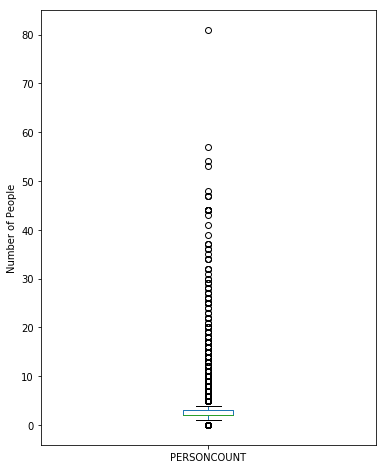

In [43]:
pc2 = df['PERSONCOUNT']
pc2.plot(kind = 'Box', figsize = (6,8))
plt.ylabel('Number of People')
plt.show()

## Map View

In [40]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt



ModuleNotFoundError: No module named 'folium'

In [ ]:
crashloc = df[['X', 'Y']]
crashloc = crashloc.dropna()
crashloc.head()
#crashloc = crashloc[:1000] #limiting the length to save time for now
#print(crashloc.X)

In [ ]:
# define the world map
crashmap = folium.Map(location = [47.606, -122.332], zoom_start = 11)

# display world map
#crashmap #commenting out because i don't need a massive map showing up all the time

In [ ]:
'''crash = folium.map.FeatureGroup()
for lat, lng, in zip(crashloc.Y, crashloc.X):
    crash.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

crashmap.add_child(crash)
print('done!')'''

In [ ]:
from folium import plugins

crashmap = folium.Map(location = [47.606, -122.332], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(crashmap)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(crashloc.Y, crashloc.X):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
crashmap

In [ ]:
#Old code bits I don't think I need but It'd rather not delete the code outright incase i need it

#decision tree stuff
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
print('Decision tree installed!')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree.fit(x_train,y_train)

predict = decTree.predict(x_test)
print(predict[0:5])
print(y_test[0:5])'''